##### Advanced Statistical Analysis and Model-Based Learning (Fall 2024-2025)
# Home Assignment 3
#### Topics:
- Statistical Estimation
- Hypothesis Testing in one and two samples
- ANOVA

#### Due: 6/1/2025 by 18:30

#### Instructions:
- Write your IDs and date at the top cell.
- Submit a copy of this notebook with code filled in the relevant places as the solution of coding exercises.
- For theoretic exercises, you can either write your solution in the notebook using $\LaTeX$ (preferred) or submit additional notes.

<hr>
<hr>

## Problem 1: ANOVA and Multiple Comparisons
Consider Israeli wines in the wine dataset ``winemag-data_first150k.csv`` used in class (downloaded from Kaggle https://www.kaggle.com/datasets/zynicide/wine-reviews?select=winemag-data_first150k.csv). Use ANOVA to measure the effect of winery (``winary``) and price (``price``) on the quality (``points``) of wine of variety ``Cabernet Sauvignon``. Note: you can ignore the ``province`` filed in the data because it contains inaccurate information.

Load dataset; replace the word ``Gamla`` with ``Golan Height Winary`` because this is the correct name of the winery; keep only relevant records according to the fields ``country`` and ``veriaty``; if you find any duplicated records in the data, remove those that are redundant. Also, we only include wineries with at least 3 samples. You can achieve the above by the code at the next cell.

In [1]:
import pandas as pd
wine_df = pd.read_csv("/content/winemag-data_first150k.csv")
variety = 'Cabernet Sauvignon'
min_per_group = 3
israeli_wines = wine_df[(wine_df.country == 'Israel') & (wine_df.variety == variety)]\
                .filter(['country', 'description','designation', 'points',
                         'price','region_1', 'region_2', 'variety', 'winery'])\
                .replace('Gamla', 'Golan Heights Winery')\
                .drop_duplicates(keep='first')\
                .groupby('winery')\
                .filter(lambda x : len(x) >= min_per_group)


<ipython-input-1-bebd8e54d0d3>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace('Gamla', 'Golan Heights Winery')\


1. Plot the boxplot with ``winery`` as the x-axis and ``points`` as the y-axis.
2. Use ANOVA to figure out whether some wineries make better Cabernets than others; print the ANOVA table and explain your conclusion.

3. **Multiple Comparisons**. Find which wineries have Cabernets ranked higher than others:

    3.1. Run all t-tests of pairs of wineries; how many of the test's P-values fall below 0.05? Is it more than what expceted if all tests are null?

    3.2. Use Bonferroni's method to decide which wineries ranked significantly higher than others by reporting on the list of pairs whose P-value is significant after Bonferroni's correction. Also indicate which one is ranked higher out of each pair.

4. **Contrasts**. Using a single t-test, test the assumption that Cabernets in the Golan area wineries: ``Bazelet HaGolan``, ``Golan Heights Winery`` have the same quality as Judean Hills area wineries: ``Katlav``, ``Psagot``, ``Shiloh Winery``, ``Titora``, ``Yatir``. Assume that the variance of all wineries in the data is the same (not only the two involved in the comparison).

5. **Multiple Comparisons and FDR**.
Consider P-values from all t-tests of pairs of wineries.

    5.1. Sort the P-values from small to large and plot the smallest 10% of the sorted list of P-values on a stem or a scatter plot in which the x-axis indicates the P-value rank (left most point is rank = 1, i.e., the smallest) and the y-axis the P-value's value.

    5.2. Assume that different tests are independent; apply BH to select a set of winery pairs in which one winery is significantly better than the others while aiming for 0.05 false pairs. How many pairs were reported? is it more or less pairs than you discovered using Bonfferoni correction

    5.3. Repeat the last item without the independence assumption, i.e., use the harmonic sum correction.

The point: FDR controlling using BH is a more liberal (less conservative) approach to identify significant discoveries in the sense that it allows us to report on more discoveries if we are willing to replace family-wise error rate control with an expected false-discovery proportion guarantee.  


In [2]:
wine_df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [3]:
wine_df.describe()

,Unnamed: 0,points,price
count,150930.000000,150930.000000,137235.000000
mean,75464.500000,87.888418,33.131482
std,43569.882402,3.222392,36.322536
min,0.000000,80.000000,4.000000
25%,37732.250000,86.000000,16.000000
50%,75464.500000,88.000000,24.000000
75%,113196.750000,90.000000,40.000000
max,150929.000000,100.000000,2300.000000


In [4]:
israeli_wines.head()

,country,description,designation,points,price,region_1,region_2,variety,winery
81,Israel,"Dark red violet in color, this wine has aromas...",Reserve,91,25.0,NaN,NaN,Cabernet Sauvignon,Binyamina
355,Israel,Restrained aromas of black plum barely set the...,NaN,91,40.0,NaN,NaN,Cabernet Sauvignon,Bazelet HaGolan
966,Israel,"This wine is dark red-violet color to the eye,...",Special Reserve,90,20.0,NaN,NaN,Cabernet Sauvignon,Segal's
970,Israel,"Dark garnet in the glass, this wine has a nose...",Mt. Tabor,90,15.0,NaN,NaN,Cabernet Sauvignon,Tabor
977,Israel,"Dark black cherry in color, this wine offers a...",NaN,90,55.0,NaN,NaN,Cabernet Sauvignon,Yatir


In [5]:
israeli_wines.describe()

,points,price,region_1,region_2
count,71.000000,66.000000,0.0,0.0
mean,87.971831,34.545455,NaN,NaN
std,2.254974,16.615268,NaN,NaN
min,80.000000,12.000000,NaN,NaN
25%,87.000000,20.250000,NaN,NaN
50%,88.000000,34.000000,NaN,NaN
75%,90.000000,41.500000,NaN,NaN
max,91.000000,75.000000,NaN,NaN


1.

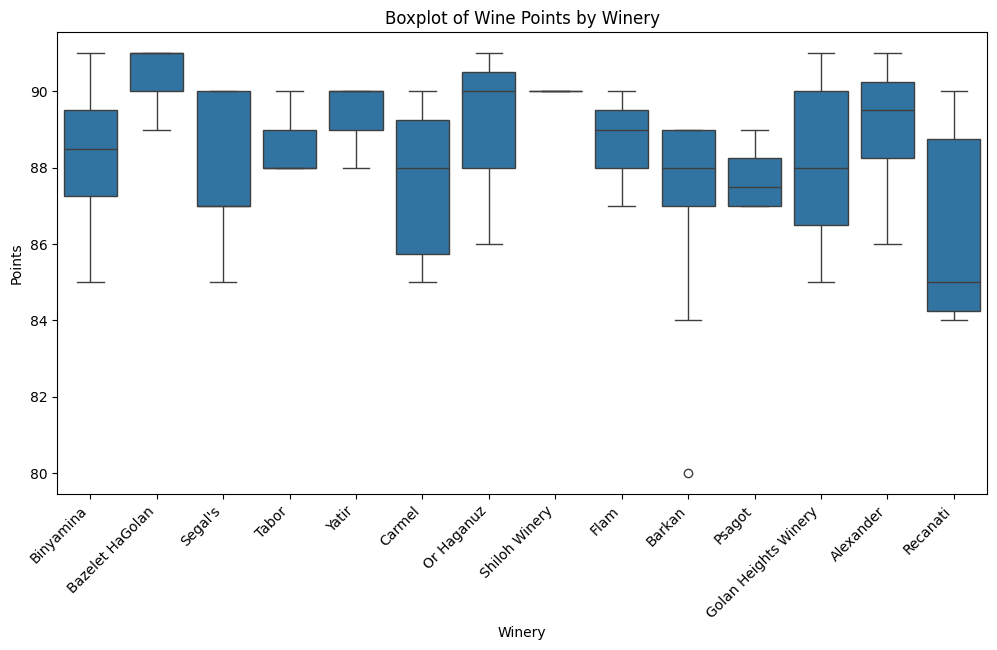

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='winery', y='points', data=israeli_wines)

plt.title('Boxplot of Wine Points by Winery')
plt.xlabel('Winery')
plt.ylabel('Points')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.show()



2.

In [7]:
from scipy.stats import f
import numpy as np

k = len(israeli_wines['winery'].unique())
n = len(israeli_wines)

y_bar = np.mean(israeli_wines['points'].values)  # mean over ALL valid wineries

SS_between = np.sum(
    [len(israeli_wines[israeli_wines['winery'] == w]) * (np.mean(israeli_wines.loc[israeli_wines['winery'] == w, 'points']) - y_bar) ** 2 for w
     in israeli_wines['winery'].unique()]
)

SS_within = np.sum(
    [np.sum(
        (israeli_wines.loc[israeli_wines['winery'] == w, 'points'] - np.mean(israeli_wines.loc[israeli_wines['winery'] == w, 'points'])) ** 2)
     for w in israeli_wines['winery'].unique()]
)

MS_between = SS_between / (k - 1)
MS_within = SS_within / (n - k)
F = MS_between / MS_within
p_value = f.sf(F, k - 1, n - k)

In [8]:
print(f"""
Source    Dof       SS                                       MS                          F
Groups    {k - 1}        {SS_between}                       {MS_between}          {F}
Error     {n - k}       {SS_within}                       {MS_within}
Total     {n - 1}       {SS_between + SS_within}
""")


Source    Dof       SS                                       MS                          F
Groups    13        83.23576153893053                       6.402750887610041          1.3382699951649166
Error     57       272.7079004329005                       4.784349130401763
Total     70       355.94366197183103



In [9]:
alpha = 0.05
if p_value < alpha:
    print("Conclusion: There is a statistically significant difference in wine quality among different wineries.")
else:
    print("Conclusion: There is no statistically significant difference in wine quality among different wineries.")

Conclusion: There is no statistically significant difference in wine quality among different wineries.


2. test

In [10]:
import scipy.stats as stats
import numpy as np

# Get unique wineries and their corresponding points
wineries = israeli_wines['winery'].unique()
groups = [israeli_wines['points'][israeli_wines['winery'] == winery] for winery in wineries]

# Perform ANOVA
fvalue, pvalue = stats.f_oneway(*groups)

# Print ANOVA table (Manually formatted)
print("+--------+-----+----------+---------+--------+--------------------+")
print("| Source | DOF |    SS    |    MS   |   F    |      p_value       |")
print("+--------+-----+----------+---------+--------+--------------------+")

# Calculate degrees of freedom
dof_groups = len(groups) - 1
dof_error = sum(len(group) for group in groups) - len(groups)

# Calculate sum of squares
ss_groups = sum(len(group) * (group.mean() - israeli_wines['points'].mean())**2 for group in groups)
ss_error = sum(sum((x - group.mean())**2 for x in group) for group in groups)

# Calculate mean squares
ms_groups = ss_groups / dof_groups
ms_error = ss_error / dof_error

# Print table rows
print(f"| Groups |  {dof_groups:2d} | {ss_groups:8.4f} | {ms_groups:8.4f} | {fvalue:6.4f} | p_value = {pvalue:.7f} |")
print(f"| Error  | {dof_error:3d} | {ss_error:8.4f} | {ms_error:8.4f} |        |                    |")
print("+--------+-----+----------+---------+--------+--------------------+")

# Explain conclusion
alpha = 0.05
if pvalue < alpha:
    print("Conclusion: There is a statistically significant difference in wine quality among different wineries.")
else:
    print("Conclusion: There is no statistically significant difference in wine quality among different wineries.")

+--------+-----+----------+---------+--------+--------------------+
| Source | DOF |    SS    |    MS   |   F    |      p_value       |
+--------+-----+----------+---------+--------+--------------------+
| Groups |  13 |  83.2358 |   6.4028 | 1.3383 | p_value = 0.2189105 |
| Error  |  57 | 272.7079 |   4.7843 |        |                    |
+--------+-----+----------+---------+--------+--------------------+
Conclusion: There is no statistically significant difference in wine quality among different wineries.


In [11]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ANOVA Test
model = ols('points ~ winery', data=israeli_wines).fit()
anova = sm.stats.anova_lm(model, typ=2)
anova

,sum_sq,df,F,PR(>F)
winery,83.235762,13.0,1.33827,0.21891
Residual,272.707900,57.0,NaN,NaN


In [12]:

alpha = 0.05
if anova['PR(>F)'][0] < alpha:
    print("Conclusion: There is a statistically significant difference in wine quality among different wineries.")
else:
    print("Conclusion: There is no statistically significant difference in wine quality among different wineries.")

Conclusion: There is no statistically significant difference in wine quality among different wineries.


<ipython-input-12-2d373ffbb5b2>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova['PR(>F)'][0] < alpha:


3.1


In [13]:
from scipy.stats import t as ttest
import numpy as np
import itertools

all_pairs = list(itertools.combinations(israeli_wines['winery'].unique(), 2))

def pair_ttest(y_0, y_1):
    n_0 = len(y_0)
    n_1 = len(y_1)
    mu_0 = np.mean(y_0)
    mu_1 = np.mean(y_1)
    degrees_of_freedom = n_0 + n_1 - 2
    s = np.sqrt((np.sum((y_0 - mu_0) ** 2) + np.sum((y_1 - mu_1) ** 2)) / degrees_of_freedom)

    if s <= 0:
        s = 1e-6

    numerator = mu_1 - mu_0
    denominator = s * np.sqrt((1 / n_0) + (1 / n_1))
    t = numerator / denominator

    return t, degrees_of_freedom

p_values_israeli_wines = []
for winery1, winery2 in all_pairs:
    group1 = israeli_wines['points'][israeli_wines['winery'] == winery1]
    group2 = israeli_wines['points'][israeli_wines['winery'] == winery2]
    t, degrees_of_freedom = pair_ttest(group1, group2)
    p_value = ttest.sf(abs(t), degrees_of_freedom)
    p_values_israeli_wines.append(p_value)

alpha = 0.05
p_values_below = list(filter(lambda x: x < (alpha / 2), p_values_israeli_wines))
print(f'{len(p_values_below)} p-values (out of {len(p_values_israeli_wines)}) fall below {alpha}')

print(f'It is less than what is expected if all tests are null.\n'
      f'It is expected that {round(alpha * len(p_values_israeli_wines))} will be rejected.')

4 p-values (out of 91) fall below 0.05
It is less than what is expected if all tests are null.
It is expected that 5 will be rejected.


3.2

In [14]:
alpha_bonferroni = alpha / len(all_pairs)
p_values_bonferroni_below = list(filter(lambda x: x < (alpha_bonferroni / 2), p_values_israeli_wines))
print(f'{len(p_values_bonferroni_below)} p-values (out of {len(p_values_israeli_wines)}) fall below {alpha} after Bonferroni\'s correction')

0 p-values (out of 91) fall below 0.05 after Bonferroni's correction


In [15]:
NEW_ALPHA = alpha / len(all_pairs)

p_vals_significant_new = [p_val for p_val in p_values_israeli_wines if p_val < NEW_ALPHA / 2]

print(f"\nThere are {len(p_vals_significant_new)} out of {len(all_pairs)} total p-values that are significantly lower than the new alpha after bonferonni correction: {NEW_ALPHA:.7f}")

print("\nThe following Wineries are significantly greater:\n\n")
for i, p_val in enumerate(p_values_israeli_wines):

    if p_val > NEW_ALPHA / 2:
        continue

    winery_1, winery_2 = all_pairs[i]

    data1 = israeli_wines[israeli_wines.winery == winery_1]["points"]
    data2 = israeli_wines[israeli_wines.winery == winery_2]["points"]

    data1_mean = np.mean(data1)
    data2_mean = np.mean(data2)

    if data1_mean > data2_mean:
        print(f"\n{winery_1}'s mean = {data1_mean:.3f} is significantly higher than {winery_2}'s mean = {data2_mean:.3f} points")

    else:
        print(f"\n{winery_2}'s mean = {data2_mean:.3f} is significantly higher than {winery_1}'s mean = {data1_mean:.3f} points")


There are 0 out of 91 total p-values that are significantly lower than the new alpha after bonferonni correction: 0.0005495

The following Wineries are significantly greater:




4.

In [16]:
golan_area_wineries = ['Bazelet HaGolan', 'Golan Heights Winery']
judean_hills_area_wineries = ['Katlav', 'Psagot', 'Shiloh Winery', 'Titora', 'Yatir']

In [17]:
golan_wines = israeli_wines[israeli_wines['winery'].isin(golan_area_wineries)]
judean_hills_wines = israeli_wines[israeli_wines['winery'].isin(judean_hills_area_wineries)]

In [18]:
from scipy import stats

t_statistic, p_value = stats.ttest_ind(
    golan_wines['points'], judean_hills_wines['points'], equal_var=True
)

In [19]:
print(f"t-statistic: {t_statistic:.2f}")
print(f"p-value: {p_value:.3f}")

alpha = 0.05  # Significance level

if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a significant difference in quality between Golan and Judean Hills Cabernet Sauvignon wines.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant difference in quality between Golan and Judean Hills Cabernet Sauvignon wines.")

t-statistic: -0.12
p-value: 0.903
Fail to reject the null hypothesis.
There is no significant difference in quality between Golan and Judean Hills Cabernet Sauvignon wines.


4. using sf ttest

In [20]:
golan_area_wineries = ['Bazelet HaGolan', 'Golan Heights Winery']
judean_hills_area_wineries = ['Katlav', 'Psagot', 'Shiloh Winery', 'Titora', 'Yatir']

golan_wines = israeli_wines[israeli_wines['winery'].isin(golan_area_wineries)]
judean_hills_wines = israeli_wines[israeli_wines['winery'].isin(judean_hills_area_wineries)]

In [21]:
from scipy.stats import t as ttest
import numpy as np

golan_mean = np.mean(golan_wines['points'])
judean_hills_mean = np.mean(judean_hills_wines['points'])
n_golan = len(golan_wines)
n_judean_hills = len(judean_hills_wines)

# Calculate the pooled standard deviation
pooled_std = np.sqrt(
    (
        (n_golan - 1) * np.var(golan_wines['points'], ddof=1)
        + (n_judean_hills - 1) * np.var(judean_hills_wines['points'], ddof=1)
    )
    / (n_golan + n_judean_hills - 2)
)

# Calculate the t-statistic
t_statistic = (golan_mean - judean_hills_mean) / (
    pooled_std * np.sqrt(1 / n_golan + 1 / n_judean_hills)
)

degrees_of_freedom = n_golan + n_judean_hills - 2
p_value = ttest.sf(abs(t_statistic), degrees_of_freedom) * 2  # Two-tailed test

print(f"t-statistic: {t_statistic:.2f}")
print(f"p-value: {p_value:.3f}")

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a significant difference in quality between Golan and Judean Hills Cabernet Sauvignon wines.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant difference in quality between Golan and Judean Hills Cabernet Sauvignon wines.")

t-statistic: -0.12
p-value: 0.903
Fail to reject the null hypothesis.
There is no significant difference in quality between Golan and Judean Hills Cabernet Sauvignon wines.


4. play ground/ tests

In [44]:
# golan_area_wineries_list = ['Bazelet HaGolan', 'Golan Heights Winery']
# judean_hills_area_wineries_list = ['Katlav', 'Psagot', 'Shiloh Winery', 'Titora', 'Yatir']
# golan_area_wineries_df = israeli_wines[israeli_wines['winery'].isin(golan_area_wineries_list)]
# judean_hills_area_wineries_df = israeli_wines[israeli_wines['winery'].isin(judean_hills_area_wineries_list)]


# n_golan = golan_area_wineries_df.groupby('winery')['points'].count().values
# n_judea = judean_hills_area_wineries_df.groupby('winery')['points'].count().values

# lambda_golan = [1 / len(golan_area_wineries_list)] * len(n_golan)
# lambda_judea = [-1 / len(judean_hills_area_wineries_list)] * len(n_judea)

# lambdas = np.array(lambda_golan + lambda_judea)

# y_bar_golan = golan_area_wineries_df.groupby('winery')['points'].mean()
# y_bar_judea = judean_hills_area_wineries_df.groupby('winery')['points'].mean()
# y_s = np.concatenate([y_bar_golan.values, y_bar_judea.values])
# n_s = np.concatenate([n_golan, n_judea])

# def ssquares(x):
#     return np.sum((x - np.mean(x)) ** 2)


# n = len(israeli_wines)
# k = len(israeli_wines['winery'].unique())
# ss_within = israeli_wines.groupby('winery')['points'].agg(ssquares).sum()
# MS_within = ss_within / (n - k)

# s = np.sqrt(MS_within)
# t = (np.sum(lambdas * y_s)) / (s * np.sqrt(np.sum((lambdas ** 2) / n_s)))
# t


41.501829384514345

In [45]:
# from scipy.stats import t as ttest

# p_value = ttest.sf(abs(t), n - k)
# p_value

1.372517235554918e-44

In [46]:
# ALPHA = 0.05
# reject = "reject" if p_value < ALPHA else "CAN'T reject"
# print(f"We {reject} H0 that Golan area wineries have the same quality(in terms of POINTS) as Judean area wineries "
#       f"with alpha = {ALPHA}, and with p-value = {p_value:.5f}")

We reject H0 that Golan area wineries have the same quality(in terms of POINTS) as Judean area wineries with alpha = 0.05, and with p-value = 0.00000


In [25]:
golan_wineries = ['Bazelet HaGolan', 'Golan Heights Winery']
judean_wineries = ['Katlav', 'Psagot', 'Shiloh Winery', 'Titora', 'Yatir']

contrast_wines = israeli_wines[israeli_wines.winery.isin(golan_wineries + judean_wineries)]
present_wineries = contrast_wines['winery'].unique()
golan_wineries = [winery for winery in golan_wineries if winery in present_wineries]
judean_wineries = [winery for winery in judean_wineries if winery in present_wineries]

contrast_wines = israeli_wines[israeli_wines.winery.isin(golan_wineries + judean_wineries)]

In [26]:
n = contrast_wines.shape[0]
k = len(golan_wineries + judean_wineries)

y_bar = contrast_wines.groupby('winery').points.mean()
counts = contrast_wines.groupby('winery').points.count()

ss_wit = contrast_wines.groupby('winery').points.agg(lambda x: np.sum((x - np.mean(x)) ** 2)).sum()
s2 = ss_wit / (n - k)

counts_golan = counts[counts.index.isin(golan_wineries)]
counts_judean = counts[counts.index.isin(judean_wineries)]

y_bar_golan = y_bar[y_bar.index.isin(golan_wineries)].mean()
y_bar_judean = y_bar[y_bar.index.isin(judean_wineries)].mean()

p = (y_bar_judean - y_bar_golan) / np.sqrt(
        s2 * (
        (1/len(counts_golan)**2) * (1/counts_golan).sum() +
        (1/len(counts_judean)**2) * (1/counts_judean).sum())
    )

In [27]:
from scipy.stats import t
# p-value
p_value = t.cdf(p, df=n-k)

In [28]:
print(f"t statistic value: {p:.3f}")
print(f"p-value: {p_value:.3f}")

t statistic value: -0.278
p-value: 0.393


In [29]:
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a significant difference in quality between Golan and Judean Hills Cabernet Sauvignon wines.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant difference in quality between Golan and Judean Hills Cabernet Sauvignon wines.")

Fail to reject the null hypothesis.
There is no significant difference in quality between Golan and Judean Hills Cabernet Sauvignon wines.


In [30]:
golan_area_wineries = ['Bazelet HaGolan', 'Golan Heights Winery']
judean_hills_area_wineries = ['Katlav', 'Psagot', 'Shiloh Winery', 'Titora', 'Yatir']

golan_wines = israeli_wines[israeli_wines['winery'].isin(golan_area_wineries)]
judean_hills_wines = israeli_wines[israeli_wines['winery'].isin(judean_hills_area_wineries)]

In [31]:
import numpy as np

# Calculate the pooled variance using all wineries
all_wineries_points = israeli_wines['points']
pooled_variance = np.var(all_wineries_points, ddof=1)  # ddof=1 for sample variance

In [32]:
from scipy import stats
import numpy as np

# Calculate the means and sample sizes for each group
golan_mean = np.mean(golan_wines['points'])
judean_hills_mean = np.mean(judean_hills_wines['points'])
n_golan = len(golan_wines)
n_judean_hills = len(judean_hills_wines)


# Calculate the t-statistic using the pooled variance
t_statistic = (golan_mean - judean_hills_mean) / (
    np.sqrt(pooled_variance * (1 / n_golan + 1 / n_judean_hills))
)

# Calculate the p-value using ttest.sf
degrees_of_freedom = n_golan + n_judean_hills - 2
p_value = stats.t.sf(abs(t_statistic), degrees_of_freedom) * 2  # Two-tailed test

In [33]:
print(f"t-statistic: {t_statistic:.2f}")
print(f"p-value: {p_value:.3f}")

alpha = 0.05  # Significance level

if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a significant difference in quality between Golan and Judean Hills Cabernet Sauvignon wines.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant difference in quality between Golan and Judean Hills Cabernet Sauvignon wines.")

t-statistic: -0.10
p-value: 0.922
Fail to reject the null hypothesis.
There is no significant difference in quality between Golan and Judean Hills Cabernet Sauvignon wines.


4. end test

5.

In [34]:
def two_smp_t(smp1, smp2):
    return stats.ttest_ind(smp1, smp2).pvalue


tests_res = {}

for w1 in wineries:
    for w2 in wineries:
        if w1 < w2:
            smp1 = israeli_wines[israeli_wines.winery == w1]['points'].values
            smp2 = israeli_wines[israeli_wines.winery == w2]['points'].values
            tests_res[(w1, w2)] = two_smp_t(smp1, smp2)

tests_res

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


{('Binyamina', "Segal's"): 0.7804868685868019,
 ('Binyamina', 'Tabor'): 0.8026095586156416,
 ('Binyamina', 'Yatir'): 0.5235978387861936,
 ('Binyamina', 'Carmel'): 0.6533843669774021,
 ('Binyamina', 'Or Haganuz'): 0.7169805727627502,
 ('Binyamina', 'Shiloh Winery'): 0.2899108743161179,
 ('Binyamina', 'Flam'): 0.8110070800293608,
 ('Binyamina', 'Psagot'): 0.7215867449329232,
 ('Binyamina', 'Golan Heights Winery'): 0.9435492500300957,
 ('Binyamina', 'Recanati'): 0.19991116072200682,
 ('Bazelet HaGolan', 'Binyamina'): 0.24466068784342,
 ('Bazelet HaGolan', "Segal's"): 0.11635036904751875,
 ('Bazelet HaGolan', 'Tabor'): 0.15183454328291213,
 ('Bazelet HaGolan', 'Yatir'): 0.3486411394402042,
 ('Bazelet HaGolan', 'Carmel'): 0.06471368864053594,
 ('Bazelet HaGolan', 'Or Haganuz'): 0.46852713556223213,
 ('Bazelet HaGolan', 'Shiloh Winery'): 0.6433299631818679,
 ('Bazelet HaGolan', 'Flam'): 0.20615125863732092,
 ('Bazelet HaGolan', 'Psagot'): 0.022703869245827225,
 ('Bazelet HaGolan', 'Golan Hei

In [35]:
pv = list(tests_res.values())
m = len(pv)

idcs = np.argsort(pv)
sorted_pvals = np.array(pv)[idcs]

percentage = 10
sub_list_length = int(len(sorted_pvals) / percentage)
sub_list_p_values = sorted_pvals[:sub_list_length]
sub_list_p_values

array([0.01061175, 0.01902824, 0.02270387, 0.02546903, 0.06330281,
       0.06471369, 0.07564221, 0.08041967, 0.08629474])

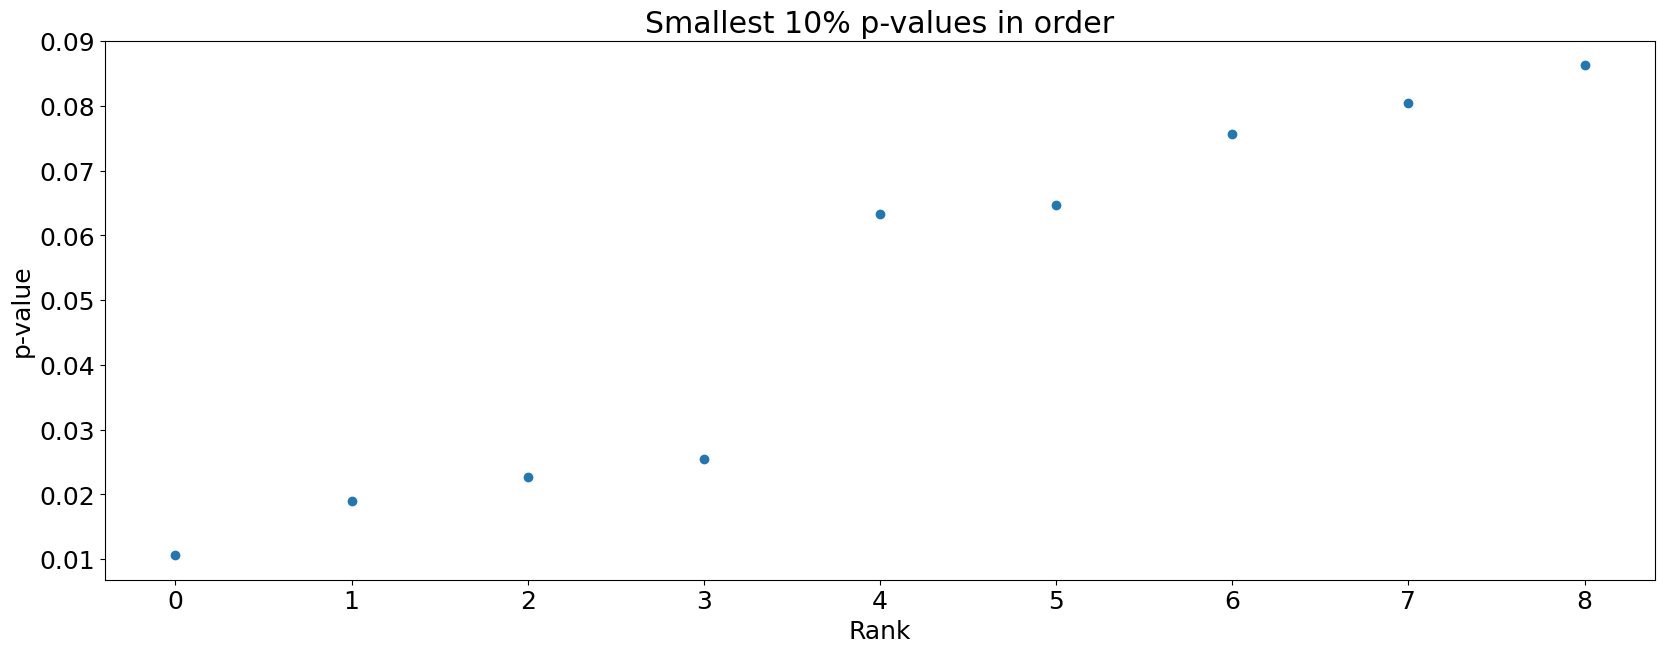

In [36]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20, 7)
plt.rcParams.update({'font.size': 18})

x_axis = range(sub_list_length)
plt.scatter(x_axis, sub_list_p_values)
plt.xlabel('Rank')
plt.ylabel('p-value')
plt.title(f'Smallest {percentage}% p-values in order')
plt.show()

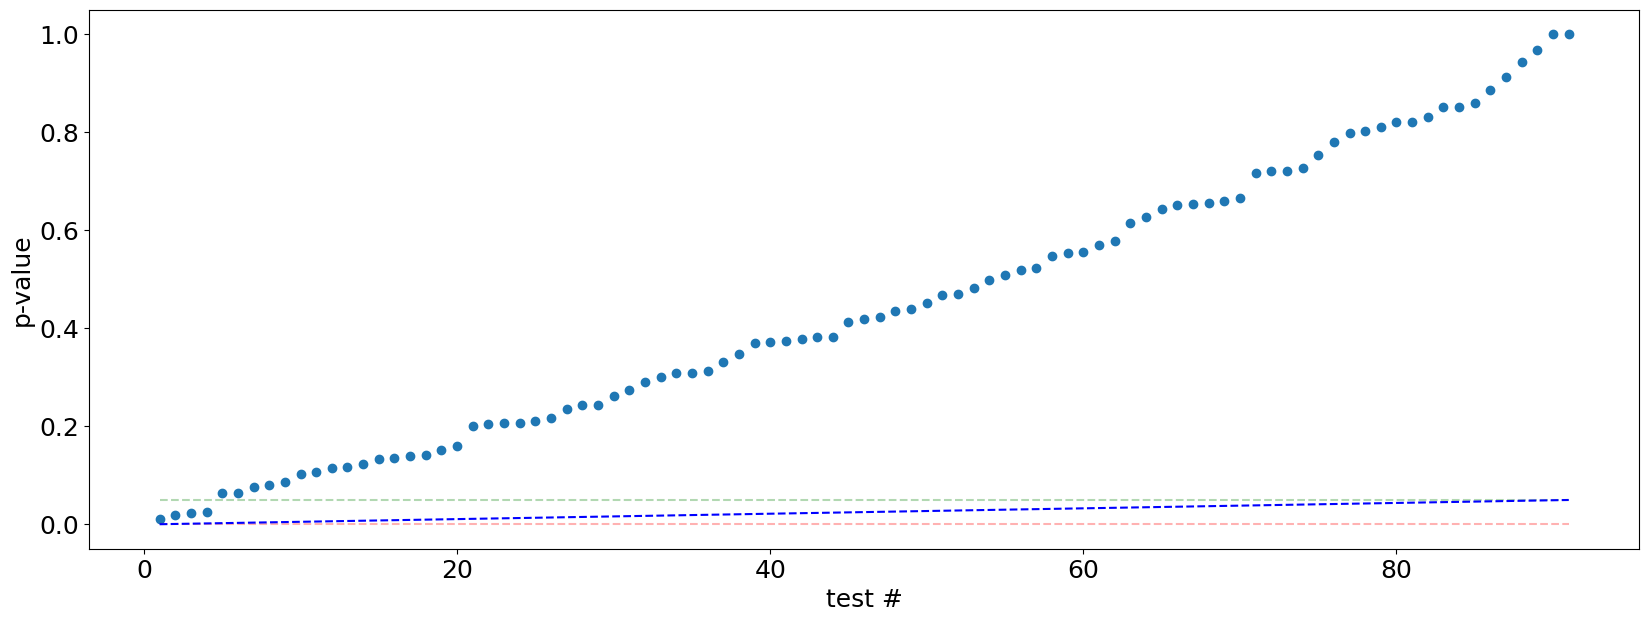

In [37]:
alpha = 0.05

plt.scatter(np.arange(1, len(pv) + 1), sorted_pvals)

# Bonferroni's:
plt.plot([1, m], [alpha / m, alpha / m], '--r', alpha=.3)
plt.plot([1, m], [alpha, alpha], '--g', alpha=.3)

# BH:
ell = np.arange(1, m + 1) / m * alpha
plt.plot(np.arange(1, m + 1), ell, '--b')

plt.ylabel('p-value')
plt.xlabel('test #')
plt.show()

In [38]:
# Discoveries by Bonferroni:
rejected_bonferroni = sorted_pvals * len(sorted_pvals) < alpha
rejected_bonferroni_pairs_list = [list(tests_res.keys())[i] for i in idcs[rejected_bonferroni]]

print(f"Discovered by Bonferroni:\n"
      f"{rejected_bonferroni_pairs_list}")

# Discoveries by BH:
rejected_BH = sorted_pvals < ell
rejected_BH_pairs_list = [list(tests_res.keys())[i] for i in idcs[rejected_BH]]
print(f"\nDiscovered by BH:\n"
      f"{rejected_BH_pairs_list}")

Discovered by Bonferroni:
[]

Discovered by BH:
[]


In [39]:
print(f'There are {len(rejected_BH_pairs_list)} false pairs using BH.\n'
      f'It is same pairs than we discovered using Bonfferoni correction ({len(rejected_bonferroni_pairs_list)} pairs).')

There are 0 false pairs using BH.
It is same pairs than we discovered using Bonfferoni correction (0 pairs).


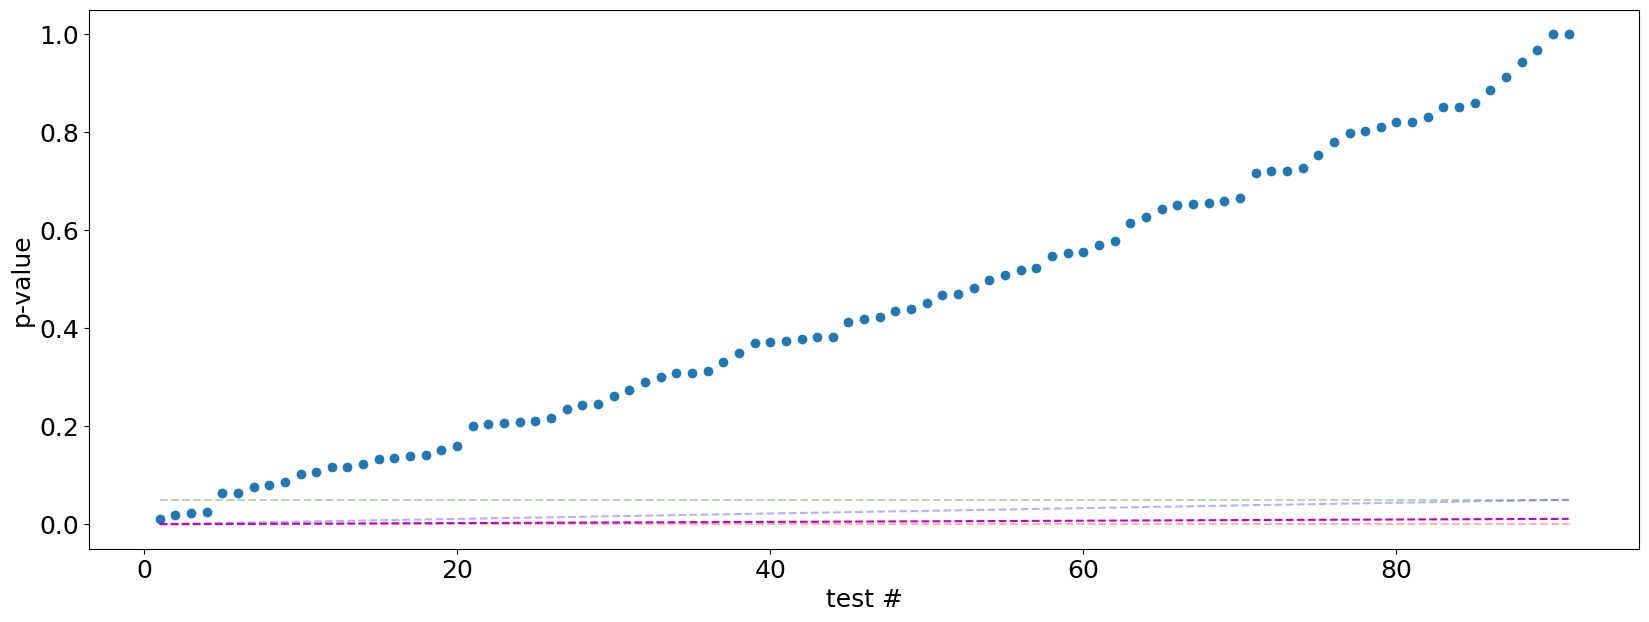

In [40]:
plt.scatter(np.arange(1, len(pv) + 1), sorted_pvals)

# Discoveries by Bonferroni's:
ell = np.arange(1, m + 1) / m * alpha
ell_dep = np.arange(1, m + 1) / m * alpha / (np.log(m))

plt.plot([1, m], [alpha / m, alpha / m], '--r', alpha=.3)
plt.plot([1, m], [alpha, alpha], '--g', alpha=.3)

plt.plot(np.arange(1, m + 1), ell, '--b', alpha=.3)
plt.plot(np.arange(1, m + 1), ell_dep, '--m')

plt.ylabel('p-value')
plt.xlabel('test #')
plt.show()

In [41]:
rejected_BH_without_independence = sorted_pvals < ell_dep
rejected_BH_without_independence_pairs_list = [list(tests_res.keys())[i] for i in
                                               idcs[rejected_BH_without_independence]]
print(f"Discovered by BH w/o independence assumption:\n"
      f"{rejected_BH_without_independence_pairs_list}\n")

print(
    f'There are {len(rejected_BH_without_independence_pairs_list)} false pairs using BH w/o independence assumption.\n'
    f'It is same pairs than we discovered using Bonfferoni correction ({len(rejected_bonferroni_pairs_list)} pairs).')

Discovered by BH w/o independence assumption:
[]

There are 0 false pairs using BH w/o independence assumption.
It is same pairs than we discovered using Bonfferoni correction (0 pairs).


## Problem 2: Exact size of Bonferroni's test
Suppose that we run multiple tests, each against $H_{0i}$ for $i=1,\ldots,n$, with independent data and obtain P-values $p_1,\ldots,p_n$. We wish to test the null hypothesis:
$$
H_0\,:\,\text{All tests are null} = \cap_{i=1}^n H_{0i}
$$
at the level $\alpha$ (e.g., $\alpha=0.05$). In class, we introduced Bonferroni's procedure that guarantees a test of size $\alpha$ regardless of whether the hypotheses are independent or not. This means that $\alpha$ bounds the probability of falsely rejecting $H_0$ form above.

1. Argue that Bonferroni's procedure is equivalent to rejecting $H_0$ if $\min p_i \leq \alpha/n$.
2. Assuming that the hypotheses are independent, find the exact size of the test in Bonferroni's procedure. Namely, a better (smaller) upper bound on the test's size than $\alpha$.
3. For $\alpha=0.05$, evaluate the difference between $\alpha$ and the exact test's size for $n=2,...,50$. Discuss what you see.



1.

- We have n tests (e.g n=${m \choose j}$ where j <= m)
- We conduct each test at level $\frac{\alpha}{n}$ (e.g. for t-tests, we reject based on $t_{m-k}^{(1-\frac{\alpha}{2n})}$)
- Under this procedure:
$$Pr(reject \quad something | H_0 \quad is \quad true) =$$
$$Pr(min \quad p_i <= \frac{\alpha}{n}) =$$
$$Pr[(p_1 <= \frac{\alpha}{n}) \cup (p_2 <= \frac{\alpha}{n}) \cup \cdots \cup (p_n <= \frac{\alpha}{n})] =$$

$$\sum_{i=1}^{n} Pr(p_i <= \frac{\alpha}{n}) =$$
$$\sum_{l=1}^{n} \frac{\alpha}{n} <= n \cdot \frac{\alpha}{n} = \alpha$$


2.
Using this step from above, we can expand it:

$$Pr[(p_1 <= \frac{\alpha}{n}) \cup (p_2 <= \frac{\alpha}{n}) \cup \cdots \cup (p_n <= \frac{\alpha}{n})] =$$
$$1 - Pr[(p_1 > \frac{\alpha}{n}) \cap (p_2 > \frac{\alpha}{n}) \cap \cdots \cap (p_n > \frac{\alpha}{n})] =$$
$$1 - \prod_{i=1}^{n} Pr(p_i > \frac{\alpha}{n}) =$$
$$1 - \prod_{i=1}^{n} [1 - Pr(p_i <= \frac{\alpha}{n})]$$

And again, from above $Pr(p_i <= \frac{\alpha}{n}) = \frac{\alpha}{n}$ so:
$$1 - \prod_{i=1}^{n} [1 - \frac{\alpha}{n}] =$$
$$1 - (1 - \frac{\alpha}{n})^n$$

3.

In [42]:
alpha = 0.05

for n in range(2, 51):
    print(f'n={n}, value={1 - (1 - (alpha / n)) ** n}')

n=2, value=0.04937500000000006
n=3, value=0.04917129629629646
n=4, value=0.049070288085937275
n=5, value=0.04900995010000009
n=6, value=0.04896983531023591
n=7, value=0.04894123581227394
n=8, value=0.04891981559586811
n=9, value=0.04890317281799017
n=10, value=0.048889869534228136
n=11, value=0.0488789922522731
n=12, value=0.04886993281129881
n=13, value=0.04886227064981796
n=14, value=0.048855705648663816
n=15, value=0.04885001789563237
n=16, value=0.048845042569365726
n=17, value=0.04884065370486401
n=18, value=0.04883675338038196
n=19, value=0.04883326432487012
n=20, value=0.04883012474683324
n=21, value=0.048827284642970814
n=22, value=0.04882470311503839
n=23, value=0.048822346387668136
n=24, value=0.04882018632241558
n=25, value=0.048818199288886865
n=26, value=0.04881636529671696
n=27, value=0.04881466732067341
n=28, value=0.0488130907705423
n=29, value=0.048811623070831534
n=30, value=0.048810253324615305
n=31, value=0.048808972042497345
n=32, value=0.048807770922485005
n=33, v

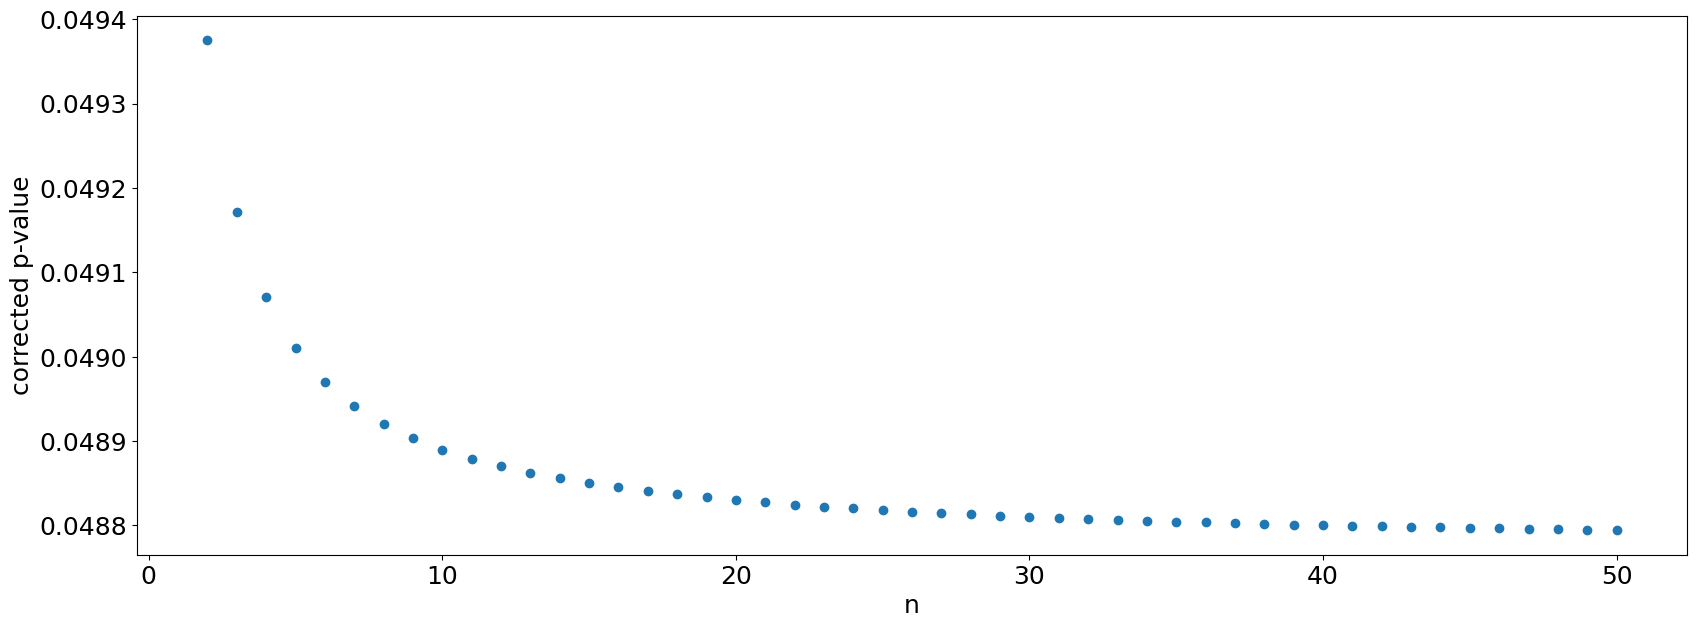

In [43]:
import numpy as np
import matplotlib.pyplot as plt

n_range = np.arange(2, 51)
corrected_p_value = [1 - (1 - (alpha / n)) ** n for n in n_range]
plt.scatter(n_range, corrected_p_value)
plt.ylabel('corrected p-value')
plt.xlabel('n')
plt.show()

As n increases, the p value threshold for rejecting the Null decreases dramatically as well.

The problem is that, by setting the p value so low, there is a decreasing chance that you have rejected a finding that really holds in the larger population.

Even with p<=0.05, and n=50 without Bonferroni\'s correction, there is a 90% chance that you reject a TRUE finding, but we rarely pay much attention to those (type II) errors - they become important in medical research, where failure to recognize a carcinogen, for example, can lead to fatal consequences.

<hr>
<hr>

## Problem 3: Prediction in Simple Regression
Consider the linear model:
$$
    y_i = \beta_0 + \beta_1 x_i + \epsilon_i,\qquad \epsilon_i \overset{\text{i.i.d.}}{\sim} \mathcal N(0,\sigma^2)
$$
$$
    Z = \begin{pmatrix}
    1 & x_1 \\
    \vdots & \vdots \\
    1 & x_n
    \end{pmatrix},\quad \beta=\begin{pmatrix}
    \beta_0 \\
    \beta_1
    \end{pmatrix},\qquad \hat{\beta}=(Z^\top Z)^{-1} Z^\top y
$$
Suppose we get a new data point $x_{n+1}$ and want to predict $y_{n+1}$. We want an interval in which this prediction will likely to land. In class, we used that
$$
\operatorname{Var}[\hat{\beta}_0 + \hat{\beta}_1 x] = \sigma^2 \left( \frac{1}{n} + \frac{(x-\bar{x})^2}{S_{XX }}\right)
$$
to obtain a confidence interval for $\beta_0 + \beta_1 x$, and a confidence band for all $x \in \mathbb{R}$. In this question, you will use a similar reasoning to get a confidence interval (and bands) for $y_{n+1}$.
1. Find the varaince of $y_{n+1} - (\hat{\beta}_0 + \hat{\beta}_1 x_{n+1})$ in terms of $\sigma^2$ and $x_1,\ldots,x_n$ and $x_{n+1}$ (you can use $\bar{x}$ and $S_{XX}$ or any other well-defined function of $x_1,\ldots,x_n$). Explain intuitively why it makes sense that this variance is larger than the variance of  $\hat{\beta}_0 + \hat{\beta}_1 x_{n+1}$.
2. Find a $1-\alpha$ confidence interval for $y_{n+1}$. Is this interval wider or narrower than that of $\hat{\beta}_0 + \hat{\beta}_1 x_{n+1}$? For what value of $x_{n+1}$ this interval is the narrowest?
3. Suppose that we take the average of two responses $y$'s at the same $x_{n+1}$, say
$$
y_{n+1} =  \frac{y_{n+1}^{(1)} + y_{n+1}^{(2)}}{2},
$$
where
$$
y_{n+1}^{(1)} = \beta_0 + \beta_1 x_{n+1} + \epsilon_{n+1}^{(1)}
$$
and
$$
y_{n+1}^{(2)} = \beta_0 + \beta_1 x_{n+1} + \epsilon_{n+1}^{(2)},
$$
where $\epsilon_{n+1}^{(1)}$ and $\epsilon_{n+1}^{(2)}$ are independent. Find a confidence interval for $y_{n+1}$. Is it wider or narrower than the interval in (2) ?

Note: The confidence interval you derived in 2 is somewhat risky to use becasue it makes the strong assumption that $\epsilon_{n+1}$ is normal. This is compared to, say, confidence intrvals for $\hat{\beta}_0$ and $\hat{\beta}_1$ which rely on averages over all observations $y_1,\ldots,y_n$ so we can use the Central Limit Theorem to argue for normality. Things get better both in terms of varaince and normality when you can take multiple measurements at the same $x_{n+1}$ and average these measurements.


1.
$$
V[y_{n+1} - (\hat{\beta}_0 + \hat{\beta}_1 x_{n+1})] =$$
$$V(y_{n+1}) + V(\hat{\beta}_0 + \hat{\beta}_1 x_{n+1}) - 2 cov[y_{n+1}, (\hat{\beta}_0 + \hat{\beta}_1 x_{n+1})] =
$$
$$\sigma^2 + \sigma^2 \left( \frac{1}{n} + \frac{(x_{n+1} - \bar{x})^2}{S_{XX }}\right) - 2 cov[y_{n+1}, (\hat{\beta}_0 + \hat{\beta}_1 x_{n+1})]
$$

We know that $\operatorname{cov}(X+a, Y+b)=\operatorname{cov}(X, Y)$ and that $\operatorname{cov}(aX, bY) = ab \operatorname{cov}(X, Y)$

And more genereally: $\operatorname{cov}(a X+b Y, c W+d V)=a c \operatorname{cov}(X, W)+a d \operatorname{cov}(X, V)+b c \operatorname{cov}(Y, W)+b d \operatorname{cov}(Y, V)$

So, $cov[y_{n+1}, (\hat{\beta}_0 + \hat{\beta}_1 x_{n+1})] = cov[\beta_0 + \beta_1 x_i + \epsilon_i, (\hat{\beta}_0 + \hat{\beta}_1 x_{n+1})] = cov[\epsilon_i, (\hat{\beta}_0 + \hat{\beta}_1 x_{n+1})] =$

$cov(\epsilon_i, \hat{\beta}_0) + x_{n+1} \cdot cov(\epsilon_i, \hat{\beta}_1) = 0 + x_{n+1} \cdot 0$

Therefore, the last term from above ($2 cov[y_{n+1}, (\hat{\beta}_0 + \hat{\beta}_1 x_{n+1})]$) is 0.

Finally,
$$\sigma^2 + \sigma^2 \left( \frac{1}{n} + \frac{(x_{n+1} - \bar{x})^2}{S_{XX }}\right) - 2 cov[y_{n+1}, (\hat{\beta}_0 + \hat{\beta}_1 x_{n+1})] =$$

$$\sigma^2 + \sigma^2 \left( \frac{1}{n} + \frac{(x_{n+1} - \bar{x})^2}{S_{XX }}\right) =$$

$$ \sigma^2 \left( 1 +  \frac{1}{n} + \frac{(x_{n+1} - \bar{x})^2}{S_{XX }}\right)$$



Intuitively, it makes sense that this variance is larger than the variance of  $\hat{\beta}_0 + \hat{\beta}_1 x_{n+1}$ because we added another term.

2.<br>
We already know that:

$$
\frac{y_{n+1} - (\hat{\beta}_0 + \hat{\beta}_1 x_{n+1})}{s \sqrt{\sigma^2 \left( 1 +  \frac{1}{n} + \frac{(x_{n+1} - \bar{x})^2}{S_{XX }}\right)}} \sim t_{n-2}
$$

Now, using the Variance we just calculated:

$$
P(y_{n+1} \in  (\hat{\beta}_0 + \hat{\beta}_1 x_{n+1}) \pm t_{n-2}^{1-\frac{\alpha}{2}} \cdot s \sqrt{\sigma^2 \left( 1 +  \frac{1}{n} + \frac{(x_{n+1} - \bar{x})^2}{S_{XX }}\right)}
$$

<br>This interval is wider than that of $\hat{\beta}_0 + \hat{\beta}_1 x_{n+1}$
<br>Obviously, this interval is the narrowest for $x_{n+1} = \bar{x}$, Because then the term: $\frac{(x_{n+1} -  \bar{x})^2}{S_{XX }}$
Wil be zero.

3. <br>
Similar way to the last sections, let's calculate the variance we get:
$$P(y_{n+1} \in  (\hat{\beta}_0 + \hat{\beta}_1 x_{n+1}) \pm t_{n-2}^{1-\frac{\alpha}{2}} \cdot s \sqrt{\sigma^2 \left( \frac{1}{2} +  \frac{1}{n} + \frac{(x_{n+1} - \bar{x})^2}{S_{XX }}\right)} $$

since now, $V(y_{n+1}) = V(\frac{\epsilon_{n+1}^{(1)}+ \epsilon_{n+1}^{(2)}}{2}) = \frac{\sigma^2}{2} $

this CI is of corse narrower then section (2). and generally, when $m \to \infty$ so CI becomes smaller, since the assumption of normality of $\frac{1}{m}\sum_{i}^{n}\epsilon_{n+1}^{(i)} \sim \mathcal{N}(0, \frac{\sigma}{m})$ is more reasonable thanks to CLT